In [1]:
%cd pyDRLinWESM
import os
os.getcwd()

C:\Users\theod\PycharmProjects\Machine_Learning\Project\pyDRLinWESM


'C:\\Users\\theod\\PycharmProjects\\Machine_Learning\\Project\\pyDRLinWESM'

In [2]:
import AYS.AYS_Environment as ays

In [3]:
env=ays.AYS_Environment(dt=1, reward_type='PB')

Init AYS Environment! 
Reward Type: PB 
Sustainability Boundaries [A_PB, Y_SF, S_ren]:  [3.45e+02 4.00e+13 0.00e+00]


In [219]:
import classes.Learning.agents as agents
from importlib import reload

reload(agents)
agent, ReplayBuffer, ActorCritic = agents.agent, agents.ReplayBuffer, agents.ActorCritic

In [220]:
from tqdm.notebook import tqdm
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

def plot(frame_idx, rewards):
    
    clear_output(True)
    plt.figure(figsize=(20,5))
    plt.subplot(131)
    plt.title('frame %s. reward: %s' % (frame_idx, rewards[-1]))
    plt.plot(rewards)
    plt.show()

In [221]:
action_dim = 4
state_dim = 3
dqn = ActorCritic(state_dim, action_dim)
memory = ReplayBuffer(1000000)

In [222]:
BATCH_SIZE = 128
TARGET_UPDATE = 100
MAX_EPISODES = 5000
MAX_STEPS = 1000
TAU = 0.001

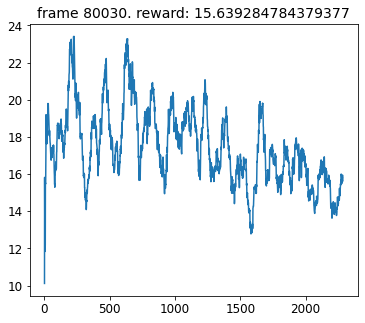


 ep_length:  29.52

 actions:  [3, 2, 0, 2, 0, 2, 2, 2, 2, 1, 2]


In [ ]:
rewards = []
mean_rewards = []
frame_idx = 0
ep_len = []
actions = np.zeros(action_dim)

for episodes in tqdm(range(MAX_EPISODES)):
    state = env.reset()
    episode_reward = 0
    trajectory = []
    for steps in range(MAX_STEPS):
        if episodes>100:
            action = (dqn.get_action(state))
        else:
            action = np.random.choice(action_dim)
            
        next_state, reward, done, = env.step(action)
        
        episode_reward += reward
        
        memory.push(state, action, reward, next_state, done)
        
        state = next_state
        
        frame_idx += 1 
        actions[action] += 1
        trajectory.append(int(action))
        
        if memory.__len__() > BATCH_SIZE:
            sample = memory.sample(BATCH_SIZE)
            dqn.update(sample)
        if done:
            break
            
    ep_len.append(steps)       
    rewards.append(episode_reward)
    mean_rewards.append(np.mean(rewards[-50:]))
#     if episodes % TARGET_UPDATE == 0:
#         dqn.target_net.load_state_dict(dqn.policy_net.state_dict()) 
        
    if frame_idx % 100:
        plot(frame_idx, mean_rewards)
        if frame_idx%1000:
            print('\n ep_length: ',np.mean(ep_len[-50:]))
            print('\n actions: ', trajectory)